# EE559 Python Instruction Session IV: Pandas and Object-Oriented Programming
includes the rest part of the pandas and OOP skills

## Pandas (Previous Part)

### Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
pd.__version__

'1.3.5'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

One way to create a `Series` is to construct a `Series` object. For example:

In [2]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [3]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])
assert len(city_names) == len(population) # check  and  are consistent
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
cities

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [4]:
cities.to_csv("cities.csv")

But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [5]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [6]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f737a5fcbd0>]],
      dtype=object)

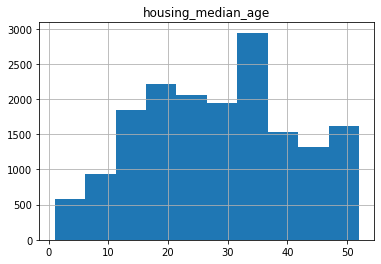

In [7]:
california_housing_dataframe.hist('housing_median_age')

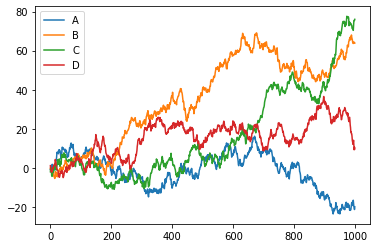

In [8]:
 df = pd.DataFrame(np.random.randn(1000, 4), columns=["A", "B", "C", "D"])
 df = df.cumsum()
 df.plot()

## Pandas (Today)

### Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In [9]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(cities.dtypes)

City name     object
Population     int64
dtype: object


In [10]:
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [11]:
print(type(cities['City name'][0]))
cities['City name'][0]

<class 'str'>


'San Francisco'

In [12]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In [13]:
cities.head(2)

,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In [14]:
cities.tail(2)

,City name,Population
1,San Jose,1015785
2,Sacramento,485199


In [15]:
cities.iloc[[2]]

,City name,Population
2,Sacramento,485199


In [16]:
cities.loc[:, 'City name']

0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In addition, *pandas* provides an extremely rich API for advanced [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html) that is too extensive to be covered here.

### Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [17]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

*pandas* `Series` can be used as arguments to most NumPy functions:

In [18]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

In [21]:
cities.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Population    784484.333333
dtype: float64

In [22]:
cities['City name'].str.lower()

0    san francisco
1         san jose
2       sacramento
Name: City name, dtype: object

In [23]:
cities.to_numpy()

array([['San Francisco', 852469],
       ['San Jose', 1015785],
       ['Sacramento', 485199]], dtype=object)

In [24]:
cities.T

,0,1,2
City name,San Francisco,San Jose,Sacramento
Population,852469,1015785,485199


For more complex single-column transformations, you can use `Series.apply`. Like the Python [map function](https://docs.python.org/2/library/functions.html#map), 
`Series.apply` accepts as an argument a [lambda function](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which is applied to each value.

The example below creates a new `Series` that indicates whether `population` is over one million:

In [25]:
population.apply(lambda x: x > 1000000)

0    False
1     True
2    False
dtype: bool


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [26]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


Modifying the `cities` table by adding a new boolean column that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing *logical and*, use `&` instead of `and`.

**Hint:** "San" in Spanish means "saint."

In [27]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


Concatenating pandas objects together with concat()

In [28]:
city = pd.DataFrame({"City name": ["San Francisco", 'Sacramento'],  "Population": [20, 30]})
all_city = pd.concat([cities, city])
all_city

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,20,NaN,NaN,NaN
1,Sacramento,30,NaN,NaN,NaN


SQL style merges

In [29]:
pd.merge(cities, city, on="City name")

,City name,Population_x,Area square miles,Population density,Is wide and has saint name,Population_y
0,San Francisco,852469,46.87,18187.945381,False,20
1,Sacramento,485199,97.92,4955.055147,False,30


By “group by” we are referring to a process involving one or more of the following steps:
* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [30]:
all_city.groupby("City name").sum()

,Population,Area square miles,Population density
City name,,,
Sacramento,485229,97.92,4955.055147
San Francisco,852489,46.87,18187.945381
San Jose,1015785,176.53,5754.177760


### Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row. 

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [31]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [32]:
cities.index

RangeIndex(start=0, stop=3, step=1)

Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [33]:
cities.reindex([2, 1, 0])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
1,San Jose,1015785,176.53,5754.177760,True
0,San Francisco,852469,46.87,18187.945381,False


In [34]:
cities.sort_values(by="City name")

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


In [35]:
cities.sort_index(axis=0, ascending=True)

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

In [36]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
1,San Jose,1015785,176.53,5754.177760,True
0,San Francisco,852469,46.87,18187.945381,False


For more information, see the [Index documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

If your `reindex` input array includes values not in the original `DataFrame` index values, `reindex` will add new rows for these "missing" indices and populate all corresponding columns with `NaN` values:

In [37]:
cities.reindex([0, 4, 5, 2]) # use index 4,5 to instead index 1

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469.0,46.87,18187.945381,False
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False


This behavior is desirable because indexes are often strings pulled from the actual data (see the [*pandas* reindex
documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html) for an example
in which the index values are browser names).

In this case, allowing "missing" indices makes it easy to reindex using an external list, as you don't have to worry about
sanitizing the input.

In [38]:
cities = cities.reindex([0, 4, 5, 2])
cities.isna()

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,False,False,False,False,False
4,True,True,True,True,True
5,True,True,True,True,True
2,False,False,False,False,False


In [39]:
cities['Population'].fillna(value=5) # inplace change uses key word: inplace=True

0    852469.0
4         5.0
5         5.0
2    485199.0
Name: Population, dtype: float64

In [40]:
cities.dropna(how="any")

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469.0,46.87,18187.945381,False
2,Sacramento,485199.0,97.92,4955.055147,False


## Object Oriented Programming (OOP)
Object-oriented programming (OOP) is a method of structuring a program by bundling related properties and behaviors into individual objects. In this tutorial, you’ll learn the basics of object-oriented programming in Python.

In this tutorial, you’ll learn how to:

1. Create a class, which is like a blueprint for creating an object
2. Use classes to create new objects
3. Model systems with class inheritance

### Classes and Objects
We have been working with different data types so far, such as strings, numbers and booleans. And we also have structures to store that data, such as list and dictionary. But not all information, data or things can be represented using strings, numbers and booleans. There are a lot of things in the real world that we can't represent in those default data types. For example, an object could represent a person with properties like a name, age, and address and behaviors such as walking, talking, breathing, and running. Or it could represent an email with properties like a recipient list, subject, and body and behaviors like adding attachments and sending.

With classes and objects, we can create our own data types. For example, we want to model a student which is not a single string or a number. We can create a class for student. Classes are used to create user-defined data structures. Classes define functions called **methods**, which identify the behaviors and actions that an object created from the class can perform with its data.

The properties that all Student objects must have are defined in a method called .\_\_init\_\_(). Every time a new Student object is created, .\_\_init\_\_() sets the initial state of the object by assigning the values of the object’s properties. That is, .\_\_init\_\_() initializes each new instance of the class.

Instance methods are functions that are defined inside a class and can only be called from an instance of that class. Just like .\_\_init\_\_(), an instance method’s first parameter is always self.

In [41]:
# The class defines what a student is
class Student:
    # Class attribute: have the same value for all class instances
    university = "USC"
    
    # Constructor
    def __init__(self, name, major, gpa):
        self.name = name      # name is an instance attribute of student
        self.major = major    # the student's major is equal to the major we passed in
        self.gpa = gpa
    
    # Dunder methods because they begin and end with double underscores
    # Defined output. The str method is useful when we want to use instances of our class in a print statement
    def __str__(self):
        return f"{self.name} got {self.gpa} GPA in {self.major} department last semester"

    # Object functions/instance methods
    def on_honor_roll(self):
      if self.gpa >= 3.5:
        return True
      else:
        return False

Creating a new object from a class is called instantiating an object.

In [42]:
# If the Student class is from a different python file, Student.py
# from Student import Student
student1 = Student('John', 'EE', 4.0) # construct a student object, an object is an actual student
student2 = Student('Jean', 'CS', 3.3)
print(student1.name, student1.major, student1.gpa, student1.university, student1.on_honor_roll())
print(student2.name, student2.major, student2.gpa, student2.university, student2.on_honor_roll())

John EE 4.0 USC True
Jean CS 3.3 USC False


Although the attributes are guaranteed to exist, their values can be changed dynamically. The key takeaway here is that custom objects are mutable by default. An object is mutable if it can be altered dynamically. For example, lists and dictionaries are mutable, but strings and tuples are immutable.

In [43]:
student1.gpa = 3.9
print(student1.gpa)

3.9


When you print student1, you get a cryptic looking message telling you that student1 is a Student object at the memory address 0x00aeff70. This message isn’t very helpful. You can change what gets printed by defining a special instance method called .\_\_str\_\_().

In [44]:
print(student1)

John got 3.9 GPA in EE department last semester


Classes and objects are extremely useful in python programming, they can help you to make your programming more organized and more powerful. 

### Inheritance
We can define a bunch of attributes and functions inside of a class and we can create another class which inherite all of those attributes without having to write any of the same methods or attributes. Newly formed classes are called child classes, and the classes that child classes are derived from are called parent classes.

In [45]:
# Generic chef
class Chef:
    def hamburger(self):
        print('The chef makes a hamburger.')
    def salad(self):
        print('The chef makes a salad.')
    def orange_chicken(self):
        print('The chef makes a orange chicken.')

In [46]:
chef1 = Chef()
chef1.hamburger()
chef1.salad()
chef1.orange_chicken()

The chef makes a hamburger.
The chef makes a salad.
The chef makes a orange chicken.


Child classes can override or extend the attributes and methods of parent classes. In other words, child classes inherit all of the parent’s attributes and methods but can also specify attributes and methods that are unique to themselves. To override a method defined on the parent class, you define a method with the same name on the child class.



In [47]:
# Chinese chef can do anything that a generic chef do
# instead of copy and physically paste all of these functions
# we can inherite from the Chef class
class ChineseChef(Chef):
    # def hamburger(self):
    #     print('The chef makes a hamburger.')
    # def salad(self):
    #     print('The chef makes a salad.')
    # def orange_chicken(self):
    #     print('The chef makes a orange chicken.')
    def fried_rice(self):
        print('The chef makes a fried rice.')
    def tofu(self):
        print('The chef makes a tofu.')
    # we can overwrite 
    def orange_chicken(self):
        print('The chef makes great orange chicken.')

In [48]:
chef2 = ChineseChef()
chef2.hamburger()
chef2.salad()
chef2.orange_chicken()
chef2.fried_rice()
chef2.tofu()

The chef makes a hamburger.
The chef makes a salad.
The chef makes great orange chicken.
The chef makes a fried rice.
The chef makes a tofu.


To determine which class a given object belongs to, you can use the built-in type():

In [49]:
type(chef2)

__main__.ChineseChef

What if you want to determine if chef2 is also an instance of the Chef class? You can do this with the built-in isinstance():



In [50]:
isinstance(chef2, Chef)

True

More generally, all objects created from a child class are instances of the parent class, although they may not be instances of other child classes.

For more information, please refer to the official [documentation](https://docs.python.org/3/tutorial/classes.html).